In [1]:
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/'

train_filename = 'train_v2_set_top_5.pkl'
test_filename = 'test_v2_set_top_5.pkl'

In [3]:
train_filepath = os.path.join(data_dir, train_filename)
test_filepath = os.path.join(data_dir, test_filename)

In [4]:
def print_some_data_samples(filepath):
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for i in range(10):
            print(data[i])

In [5]:
print_some_data_samples(train_filepath)
print()
print_some_data_samples(test_filepath)

{'id': 7842, 'cuisine': 'chinese', 'ingredients': 'molasses ginger garlic cloves sesame oil rice vinegar steak jalapeno chilies navel oranges corn starch low sodium soy sauce red pepper flakes scallions canola oil'}
{'id': 10981, 'cuisine': 'italian', 'ingredients': 'pesto ground black pepper salt rocket leaves white wine cannellini beans crumbled goat cheese andouille chicken sausage penne pasta grape tomatoes olive oil garlic'}
{'id': 42353, 'cuisine': 'mexican', 'ingredients': 'green bell pepper light mayonnaise sour cream water green chilies onions cheddar cheese lean ground beef biscuit mix roma tomatoes taco seasoning'}
{'id': 21992, 'cuisine': 'chinese', 'ingredients': 'pepper dry sherry peanut oil tomatoes sesame seeds maple syrup boneless skinless chicken breast halves red leaf lettuce salt chinese five-spice powder soy sauce fresh ginger root all-purpose flour'}
{'id': 8554, 'cuisine': 'italian', 'ingredients': 'white vinegar vegetable oil italian seasoning feta cheese freshl

In [6]:
def print_class_distribution(filepath):
    count_italian = 0
    count_mexican = 0
    count_southern_us = 0
    count_indian = 0
    count_chinese = 0

    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for item in data:
            cuisine_type = item['cuisine']
            if cuisine_type == 'italian':
                count_italian +=1
            elif cuisine_type == 'mexican':
                count_mexican +=1
            elif cuisine_type == 'southern_us':
                count_southern_us +=1
            elif cuisine_type == 'indian':
                count_indian +=1
            elif cuisine_type == 'chinese':
                count_chinese +=1
            else:
                print(cuisine_type)

    print(count_italian, count_mexican, count_southern_us, count_indian, count_chinese)
    plt.bar(['italian', 'mexican', 'southern us', 'indian', 'chinese'], [count_italian, count_mexican, count_southern_us, count_indian, count_chinese])
    plt.show()

6238 5179 3448 2415 2137


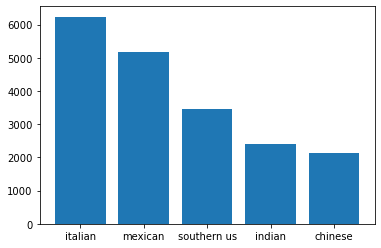


1600 1259 872 588 536


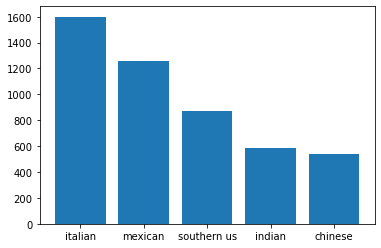

In [7]:
print_class_distribution(train_filepath)
print()
print_class_distribution(test_filepath)

In [8]:
def plot_histograms_ingredients_word_counts(filepath):
    ingredients_word_counts = []
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
        for item in data:
            ingredients = item['ingredients'].split(' ')
            ingredients_word_counts.append(len(ingredients))
#     print(ingredients_word_counts)
    print('Median list of ingredients (in terms of word count):', np.median(np.array(ingredients_word_counts)))
    print('Average list of ingredients (in terms of word count):', np.mean(np.array(ingredients_word_counts)))
    print('Shortest list of ingredients (in terms of word count):', min(ingredients_word_counts))
    print('Longest list of ingredients (in terms of word count):', max(ingredients_word_counts))
    plt.figure(figsize=(15, 6), dpi=80)
    plt.hist(ingredients_word_counts, bins=25)
    plt.show()

Median list of ingredients (in terms of word count): 20.0
Average list of ingredients (in terms of word count): 20.426378946284185
Shortest list of ingredients (in terms of word count): 1
Longest list of ingredients (in terms of word count): 136


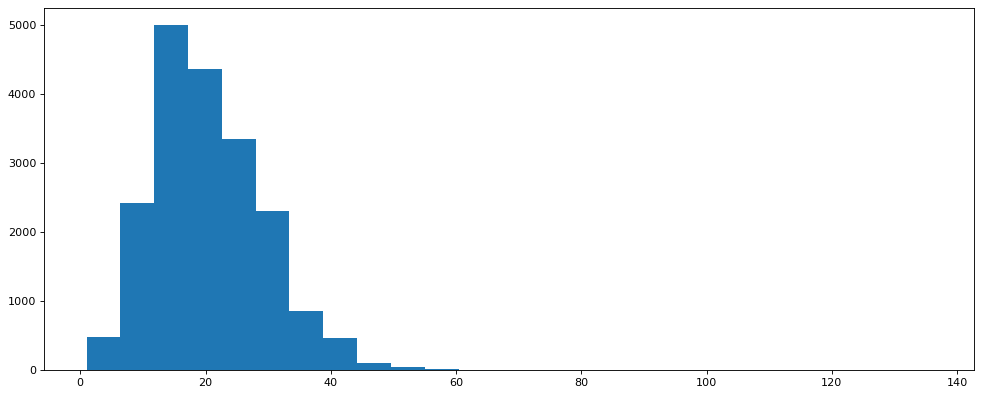


Median list of ingredients (in terms of word count): 19.0
Average list of ingredients (in terms of word count): 20.510607621009267
Shortest list of ingredients (in terms of word count): 2
Longest list of ingredients (in terms of word count): 102


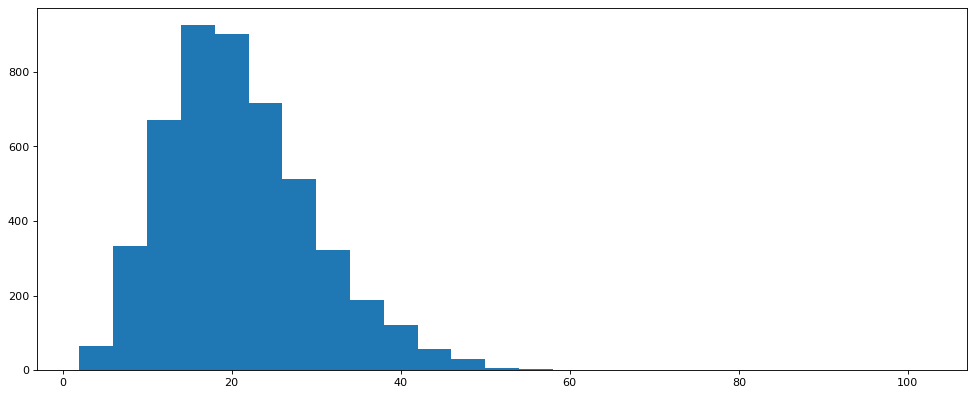

In [9]:
plot_histograms_ingredients_word_counts(train_filepath)
print()
plot_histograms_ingredients_word_counts(test_filepath)